# Similarity Matrix and Heatmap
This matrix gives us the measure of how much each of the positions on a soccer field overlaps with one another in terms of the skills that they possess or require. We have 10 attributes for each of the conventional positions. Setting the average of the ratings under each attribute as the threshold, we are considering a player in a particula poisition to possess the attribute if the rating is greater than or equal to the threshold value. This gives us a list of skills that a player in each of the 4 positions possesses. 

After this, we find out the Jaccard Similarity (A intersection B)/(A union B) between each of the positions. The intersection and union represent the intersection and union of the skills between each of the positions. A 4x4 matrix is created in which the value of each element represents the measure of the overlap between each position. For example, Attack and Attack give a Jaccard Similarity value of 1. Attack and Midfield gives a value of 0.71, while Attack and Goalkeeper, which have no skills in common gives a value of 0.

In [21]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import datetime as DT

"""
data prep to plot position profiles for each position 
average all values

"""


#read file
df1 = pd.read_csv('players11.csv')
df2 = pd.read_csv('players12.csv')
#clean df3
df3 = pd.read_csv('players14.csv')



frames = [df1, df2]
df = pd.concat(frames,ignore_index=True)


#set filter: how strong would you like your players?
#df = df[(df['overall_rating']>90) & (df['sliding_tackle']>20)]

#change dob to age
now = pd.Timestamp(DT.datetime.now())
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)    # 1
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')    # 3


#Group parameters
df['Tackling'] = df[['SlidingTackle','StandingTackle']].mean(axis=1)
df['Passing'] = df[['LongPassing','ShortPassing']].mean(axis=1)
df['Movement'] = df[['Acceleration','SprintSpeed','Agility']].mean(axis=1)
df = df[(df['club_pos']!='SUB')]

bar_df = df


#Position Profile
mapp = {'RM':'Midfield',
'GK': 'Goalkeeper',
'CB': 'Defense',
'LCB':'Defense',
'RCB': 'Defense',
'LB':'Defense',
'RB': 'Defense',
'RWB': 'Defense',
'LWB': 'Defense',
'CM' : 'Midfield',
'LDM': 'Midfield',
'LAM': 'Midfield',
'RDM': 'Midfield',
'RAM': 'Midfield',
'RCM' : 'Midfield',
'LCM' : 'Midfield',
'CDM': 'Midfield',
'CAM': 'Midfield',
'LM' : 'Midfield',
'RM' : 'Midfield',
'ST': 'Attack',
'CF': 'Attack',
'LW': 'Attack',
'RW': 'Attack',
'RS': 'Attack',
'LS' : 'Attack'}

#Attack: Ronaldo Vs Messi  (Finishing, SprintSpeed, Acceleration, Positioning, ShotPower, Dribbling)
#Midfield: Iniesta Vs Ribery/Pogba (BallControl,Interceptions,Stamina, SprintSpeed, Passing,Crossing)
#Defense: Diego Godin Vs Marcelo (Stamina,Interceptions,BallControl,Passing,Tackling,Marking)





#group positions by above mapping
grouped =  df.set_index('club_pos').groupby(mapp)
new_df = grouped
df = grouped.agg([np.mean])

#remove unnecessary titles
df.columns = df.columns.droplevel(1)

#Take wanted parameters
#set filter: what attributes would you like to see?
df = df[['Tackling','Interceptions','Passing','BallControl','Dribbling','Movement','Finishing','GKDiving','GKHandling','GKKicking']]
#IF not including goalkeepers
#df.drop('Goalkeeper',inplace=True)
#cleanup
df.reset_index(level=0, inplace=True)
df.rename(index=int, columns={"index": "Position"},inplace=True)

df

,Position,Tackling,Interceptions,Passing,BallControl,Dribbling,Movement,Finishing,GKDiving,GKHandling,GKKicking
0,Attack,28.888337,31.955335,59.982630,71.771712,70.676179,73.657982,71.875931,10.544665,10.784119,10.698511
1,Defense,70.759009,69.292230,62.356419,62.918356,56.322635,65.146396,38.471284,10.707207,10.673986,10.823198
2,Goalkeeper,14.495575,19.356195,29.067478,22.148230,15.292035,43.803835,13.606195,72.856195,69.882743,67.654867
3,Midfield,53.585360,56.109157,69.597775,71.863942,70.065701,71.743749,59.595447,10.629591,10.744439,10.885670


In [22]:
def similarity_matrix(df):
    '''Function: similarity_matrix
    Param: df, type: pandas dataframe
    Description: This function takes as input a pandas dataframe comprising the ratings for
    each attribute corresponding to each position and gives as output a 4x4 similarity matrix
    '''
    a = np.zeros(shape=(4,4))
    Attribute_Matrix = [[] for y in range(4)]
    for j in range(4):    
        for i in df.columns[1:]:
            avg = df[i].mean()
            if df[i][j] >= avg:
                Attribute_Matrix[j].append(i)
    for i in range(4):
        for j in range(4):
            a[i][j] = float(len(list(set(Attribute_Matrix[i]) & set(Attribute_Matrix[j]))))/len(list(set(Attribute_Matrix[i]) | set(Attribute_Matrix[j])))
    s_m = pd.DataFrame(a,columns=['Attack', 'Defense', 'Goalkeeper', 'Midfield'],index=['Attack', 'Defense', 'Goalkeeper', 'Midfield'])
    return s_m

In [23]:
similarity_matrix(df)

,Attack,Defense,Goalkeeper,Midfield
Attack,1.000000,0.571429,0.0,0.714286
Defense,0.571429,1.000000,0.0,0.857143
Goalkeeper,0.000000,0.000000,1.0,0.000000
Midfield,0.714286,0.857143,0.0,1.000000


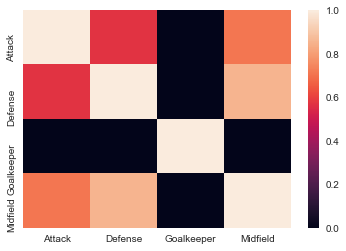

In [24]:
import seaborn as sns
sns.set()
sns.heatmap(similarity_matrix(df))